# Identitas Kelompok
Nomor Kelompok: 1

Nama Kelompok: Uranus

Ketua Kelompok: Rijal Abdulhakim

Anggota kelompok:
1. Yusuf Rifqi H
2. M Zamzam I
3. Sahel Abdat
4. Putrini Nur A H
5. Surya Karunia R
6. M Rendra Putra P

Pilihan Dataset: Online Shoppers Purchasing Intention

# Import Library & Load Dataset

In [1]:
!pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 320 kB 36.0 MB/s 
     |████████████████████████████████| 2.0 MB 49.0 MB/s 
     |████████████████████████████████| 17.8 MB 587 kB/s 
     |████████████████████████████████| 120 kB 60.4 MB/s 
     |████████████████████████████████| 1.7 MB 43.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 6.8 MB 54.6 MB/s 
     |████████████████████████████████| 56 kB 5.0 MB/s 
     |████████████████████████████████| 88 kB 7.4 MB/s 
     |████████████████████████████████| 262 kB 40.5 MB/s 
     |████████████████████████████████| 1.3 MB 27.3 MB/s 
     |████████████████████████████████| 167 kB 63.7 MB/s 
     |████████████████████████████████| 1.3 MB 29.2 MB/s 
     |████████████████████████████████| 

In [2]:
!pip install markupsafe==2.0.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 2.1.1
    Uninstalling MarkupSafe-2.1.1:
      Successfully uninstalled MarkupSafe-2.1.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires markupsafe~=2.1.1, but you have markupsafe 2.0.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn import over_sampling
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
import jinja2
from pycaret.classification import *
from lightgbm import LGBMClassifier
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [4]:
df = pd.read_excel('df_preprocesing.xlsx')
df.sample(5)

,OperatingSystems,Browser,Region,Weekend,Revenue,exitrates_norm,administrative_std,administrativeduration_std,informational_std,informationalduration_std,productrelated_std,pagevalues_std,specialday_std,traffictype_std,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor,Month_Aug,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,Kuartil
4278,2,4,7,0,0,0.121429,-0.738966,-0.269645,-0.30803,-0.406855,0.802963,-0.436361,0.239133,0.215410,0,0,1,0,0,0,0,0,0,1,0,0,0,2
9857,1,1,3,0,0,0.057870,1.883834,1.592341,-0.30803,-0.406855,0.660937,-0.436361,0.239133,1.459835,0,0,1,0,1,0,0,0,0,0,0,0,0,4
1603,2,2,1,0,0,0.166667,-0.738966,-0.927299,-0.30803,-0.406855,-0.253141,-0.436361,0.239133,0.215410,0,0,1,0,0,0,0,0,1,0,0,0,0,1
621,2,4,3,1,1,0.020000,0.634649,0.649947,-0.30803,1.848174,0.887385,2.224785,0.239133,1.267085,0,0,1,0,0,0,0,0,1,0,0,0,0,1
8087,4,2,3,0,1,0.333333,-0.738966,-0.927299,-0.30803,-0.406855,-1.324069,-0.436361,0.239133,-0.336942,0,0,1,0,0,0,0,0,0,0,1,0,0,4


# Modeling

## A. Split Data Train & Test

In [5]:
x_train, x_test, y_train, y_test = train_test_split(df.drop(columns=['Revenue']), df['Revenue'], test_size=0.2, random_state=28)

### Handling Imbalance Data With Smote

In [6]:
x_smote, y_smote = over_sampling.SMOTE('all', random_state=28).fit_resample(x_train, y_train)

In [7]:
print('Original')
print(pd.Series(y_train).value_counts())
print('\nSMOTE')
print(pd.Series(y_smote).value_counts())

Original
0    7561
1    1208
Name: Revenue, dtype: int64

SMOTE
1    7561
0    7561
Name: Revenue, dtype: int64


## B. Modeling

In [8]:
# initialize setup
s = setup(df, 
          target = 'Revenue', 
          train_size = 0.8,
          fix_imbalance = True,
          numeric_features = df.drop('Revenue', axis=1).columns.tolist())

,Description,Value
0,session_id,7247
1,Target,Revenue
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(10962, 28)"
5,Missing Values,False
6,Numeric Features,27
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [9]:
# compare all models
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9002,0.9219,0.6402,0.6450,0.6417,0.5838,0.5844,0.761
rf,Random Forest Classifier,0.8931,0.9147,0.6458,0.6132,0.6282,0.5660,0.5668,2.576
et,Extra Trees Classifier,0.8927,0.9101,0.5978,0.6236,0.6090,0.5470,0.5480,2.011
gbc,Gradient Boosting Classifier,0.8925,0.9209,0.7167,0.5970,0.6509,0.5880,0.5918,4.171
ada,Ada Boost Classifier,0.8871,0.9051,0.7101,0.5793,0.6375,0.5715,0.5761,1.177
ridge,Ridge Classifier,0.8798,0.0000,0.7395,0.5535,0.6326,0.5625,0.5714,0.132
lda,Linear Discriminant Analysis,0.8798,0.9057,0.7395,0.5535,0.6326,0.5625,0.5714,0.201
dummy,Dummy Classifier,0.8600,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.108
lr,Logistic Regression,0.8533,0.9060,0.7850,0.4863,0.5998,0.5162,0.5389,1.437
dt,Decision Tree Classifier,0.8533,0.7331,0.5660,0.4821,0.5196,0.4339,0.4365,0.300


## C. Model Evaluation: Pemilihan dan perhitungan metrics

* Tim kami berfokus kepada metric **precision** karena ingin meningkatkan **False Negatif** untuk meningkatkan angka pembelian dari pengunjung agar mendapatkan revenue
* Melihat metric **AUC** untuk mendapatkan performa model yang tinggi
* Melihat **waktu eksekusi** untuk mendapatkan waktu yang efektif (rendah) saat membuat model
* Berdasarkan hasil perbandingan model dengan Pycaret dengan mepertimbangan metrics, model **Light Gradient Boosting Machine** menjadi pilihan karena memiliki nilai **Precision cukup tinggi**, nilai **AUC yang tinggi**, dan **waktu eksekusi yang relatif rendah**, serta **metric-metric lainnya yang lebih baik diantara model lainnya**.



## D. Model Evaluation: Apakah model sudah best-fit?

In [31]:
from pandas.core.common import random_state
best_model = create_model('lightgbm', random_state=28)
predict_test=predict_model(best_model, raw_score=True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9111,0.9399,0.7541,0.6571,0.7023,0.6503,0.6524
1,0.8951,0.9008,0.6098,0.6303,0.6198,0.5590,0.5591
2,0.8985,0.9261,0.6016,0.6491,0.6245,0.5659,0.5664
3,0.9019,0.9264,0.6098,0.6637,0.6356,0.5791,0.5798
4,0.8962,0.9242,0.6098,0.6356,0.6224,0.5623,0.5625
5,0.8974,0.9227,0.5854,0.6486,0.6154,0.5564,0.5573
6,0.8940,0.9108,0.6504,0.6154,0.6324,0.5705,0.5708
7,0.9019,0.9211,0.6748,0.6434,0.6587,0.6015,0.6017
8,0.9019,0.9334,0.6667,0.6457,0.6560,0.5988,0.5989


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9106,0.9353,0.6233,0.6926,0.6561,0.6049,0.6061


* Nilai **AUC test sedikit lebih besar dari nilai trainnya** yakni selisih **0.0134**
* Nilai **precision test lebih besar dari nilai trainnya** yakni selisih **0.0217**
* Nilai **accuracy test sedikit lebih besar dari trainnya** yakni selisih **0.0104**
* Dari pengamatan diatas tim kami menyimpulkan bahwa model ini sudah cukup **Best-Fit**

## E. Hyperparameter Tuning

In [11]:
np.random.seed(28)
model = LGBMClassifier(random_state=28)

param_grid = {
    'boosting_type':['gbdt', 'dart', 'goss', 'rf'],
    'objective':['regression', 'binary', 'multiclass', 'lambdarank'],
    # 'max_depth':np.arange(5,28),
    # 'num_leaves':np.arange(5,20),
}

lgbmc = GridSearchCV(model, param_grid=param_grid, scoring='precision', cv=10)
lgbmc.fit(x_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                      colsample_bytree=1.0,
                                      importance_type='split',
                                      learning_rate=0.1, max_depth=-1,
                                      min_child_samples=20,
                                      min_child_weight=0.001,
                                      min_split_gain=0.0, n_estimators=100,
                                      n_jobs=-1, num_leaves=31, objective=None,
                                      random_state=28, reg_alpha=0.0,
                                      reg_lambda=0.0, silent='warn',
                                      subsample=1.0, subsample_for_bin=200000,
                                      subsample_freq=0),
             iid='deprecated', n_jobs=None,
             param_grid={'boosting_type': ['gbdt', 'dart', 'goss', 'rf'],
                   

In [12]:
def plot_confusion_matrix(cm):
  fig,ax =plt.subplots()
  sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',ax=ax)
  ax.set_xticklabels(['Revenue False','Revenue True'])
  ax.set_yticklabels(['Revenue False','Revenue True'])
  ax.set_title('Confusion Matrix')
  ax.set_xlabel('Predicted Value')
  ax.set_ylabel('Actual Value')

best params :  {'boosting_type': 'dart', 'objective': 'regression'}


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9421,0.9604,0.6233,0.9303,0.7465,0.7153,0.7336


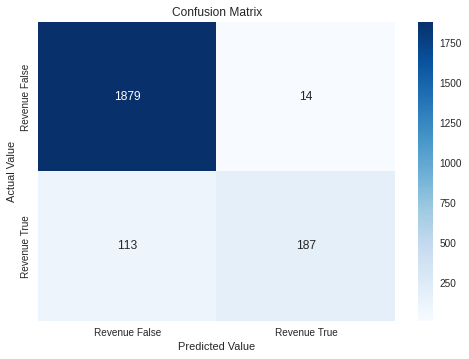

In [13]:
print('best params : ', lgbmc.best_params_)
predict_test_tuned = predict_model(lgbmc, raw_score=True)
plot_confusion_matrix(confusion_matrix(predict_test_tuned.Revenue, predict_test_tuned.Label))

* Model hasil Hyperparameter Tuning memiliki nilai Accuracy Test, AUC Test, dan Precision Test lebih tinggi dari nilai Train-nya dengan perbedaan nilai yang kecil. Menandakan bahwa model hasil hypertuning **tidak overfitting maupun *underfitting**.

* Model yang dipilih dapat **mendeteksi dengan baik** kepada pengungjung yang tidak menghasilkan Revenue yang dapat terlihat dari nilai **Precision yang tinggi**. Dari nilai **AUC**-nya, model **memiliki nilai yang tinggi** menandakan bahwa **performa model sudah bagus**.

# Feature Importance

Text(0.5, 1.0, 'feature importance score')

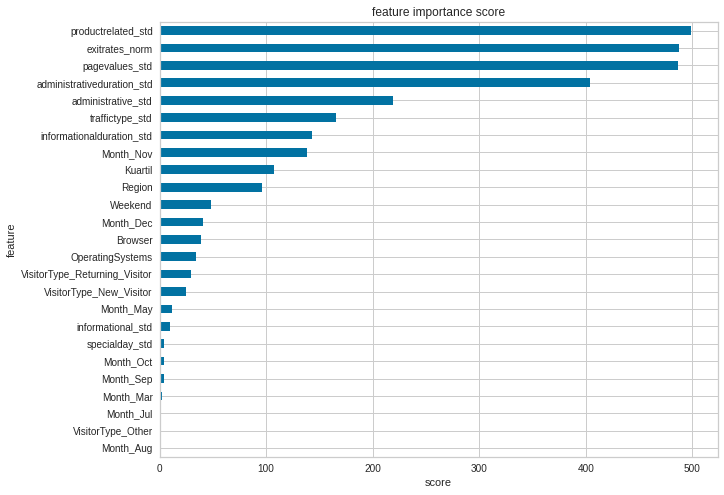

In [14]:
feat_importances = pd.Series(lgbmc.best_estimator_.feature_importances_, index=x_train.columns)
ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
ax.invert_yaxis()

plt.xlabel('score')
plt.ylabel('feature')
plt.title('feature importance score')

Dari feature importance tersebut dapat dilihat bahwa feature ProductRelated memiliki pengaruh paling tertinggi. ProductRelated adalah jumlah halaman produk terkait yang dikunjungi oleh user. Dengan demikian untuk kedepannya kita dapat menampilkan rekomendasi product-product terkait yang dikunjungi user dengan lebih banyak untuk meningkatkan kemungkinan user untuk membeli.

## Iterasi Modeling

Tim kami akan memilih 5 feature teratas yang dihasilkan oleh feature importance untuk dilakukan modeling kembali. Feature tersebut adalah ProductRelated, ExitRates, PageValues, AdministrativeDuration, dan Administrative. Modeling ulang ini kami lakukan dengan persentasi split yang sama, metode smote, dan menggunakan hyperparameter tuning kembali

In [15]:
df_fi = df[['productrelated_std', 'exitrates_norm', 'pagevalues_std', 'administrativeduration_std', 'administrative_std', 'Revenue']].copy()
df_fi.sample(5)

,productrelated_std,exitrates_norm,pagevalues_std,administrativeduration_std,administrative_std,Revenue
4931,0.292850,0.045455,-0.436361,-0.927299,-0.738966,0
7076,1.227223,0.101562,-0.436361,0.649947,-0.738966,0
9257,1.783657,0.103934,-0.436361,-0.927299,-0.738966,0
4887,-0.943497,1.000000,-0.436361,-0.927299,-0.738966,0
5279,-2.090641,1.000000,-0.436361,-0.927299,-0.738966,0


In [16]:
x_fi_train, x_fi_test, y_fi_train, y_fi_test = train_test_split(
    df_fi.drop(columns=['Revenue']),
    df_fi['Revenue'],
    test_size=0.2,
    random_state=28
)

In [17]:
x_fi_smote, y_fi_smote = over_sampling.SMOTE('all', random_state=28).fit_resample(x_fi_train, y_fi_train)

In [18]:
np.random.seed(28)
model = LGBMClassifier(random_state=28)

param_grid = {
    'boosting_type':['gbdt', 'dart', 'goss', 'rf'],
    'objective':['regression', 'binary', 'multiclass', 'lambdarank'],
}

lgbmc_fi = GridSearchCV(model, param_grid=param_grid, scoring='precision', cv=10)
lgbmc_fi.fit(x_fi_train, y_fi_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                      colsample_bytree=1.0,
                                      importance_type='split',
                                      learning_rate=0.1, max_depth=-1,
                                      min_child_samples=20,
                                      min_child_weight=0.001,
                                      min_split_gain=0.0, n_estimators=100,
                                      n_jobs=-1, num_leaves=31, objective=None,
                                      random_state=28, reg_alpha=0.0,
                                      reg_lambda=0.0, silent='warn',
                                      subsample=1.0, subsample_for_bin=200000,
                                      subsample_freq=0),
             iid='deprecated', n_jobs=None,
             param_grid={'boosting_type': ['gbdt', 'dart', 'goss', 'rf'],
                   

In [24]:
y_fi_pred_train = lgbmc_fi.predict(x_fi_train)
y_fi_pred_test = lgbmc_fi.predict(x_fi_test)
hasil = {
    'data':['train', 'test'],
    'accuracy':[accuracy_score(y_fi_train, y_fi_pred_train), accuracy_score(y_fi_test, y_fi_pred_test)],
    'precision':[precision_score(y_fi_train, y_fi_pred_train), precision_score(y_fi_test, y_fi_pred_test)],
    'roc_auc':[roc_auc_score(y_fi_train, y_fi_pred_train), roc_auc_score(y_fi_test, y_fi_pred_test)],
}
df_hasil = pd.DataFrame(hasil)

In [26]:
print('best params : ', lgbmc_fi.best_params_)
df_hasil

best params :  {'boosting_type': 'dart', 'objective': 'regression'}


,data,accuracy,precision,roc_auc
0,train,0.944121,0.914550,0.822921
1,test,0.890105,0.690821,0.706353


Setelah dilakukan iterasi model dan dievaluasi kembali. Hasilnya menunjukan bahwa model iterasi ini mengalami **overfitting** yang dapat dilihat dari nilai accuracy, precision, dan roc_auc yang lebih besar pada data train dibangkan data test. Perbedaan nilainya pun cukup signifikan. Dengan demikian **model hasil iterasi tidak lebih baik dari model semula**